In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
import shap
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('/Users/venkat-a/Downloads/t2/t2/term-deposit-marketing-2020.csv')
# Display the first few rows of the dataset for an overview
data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


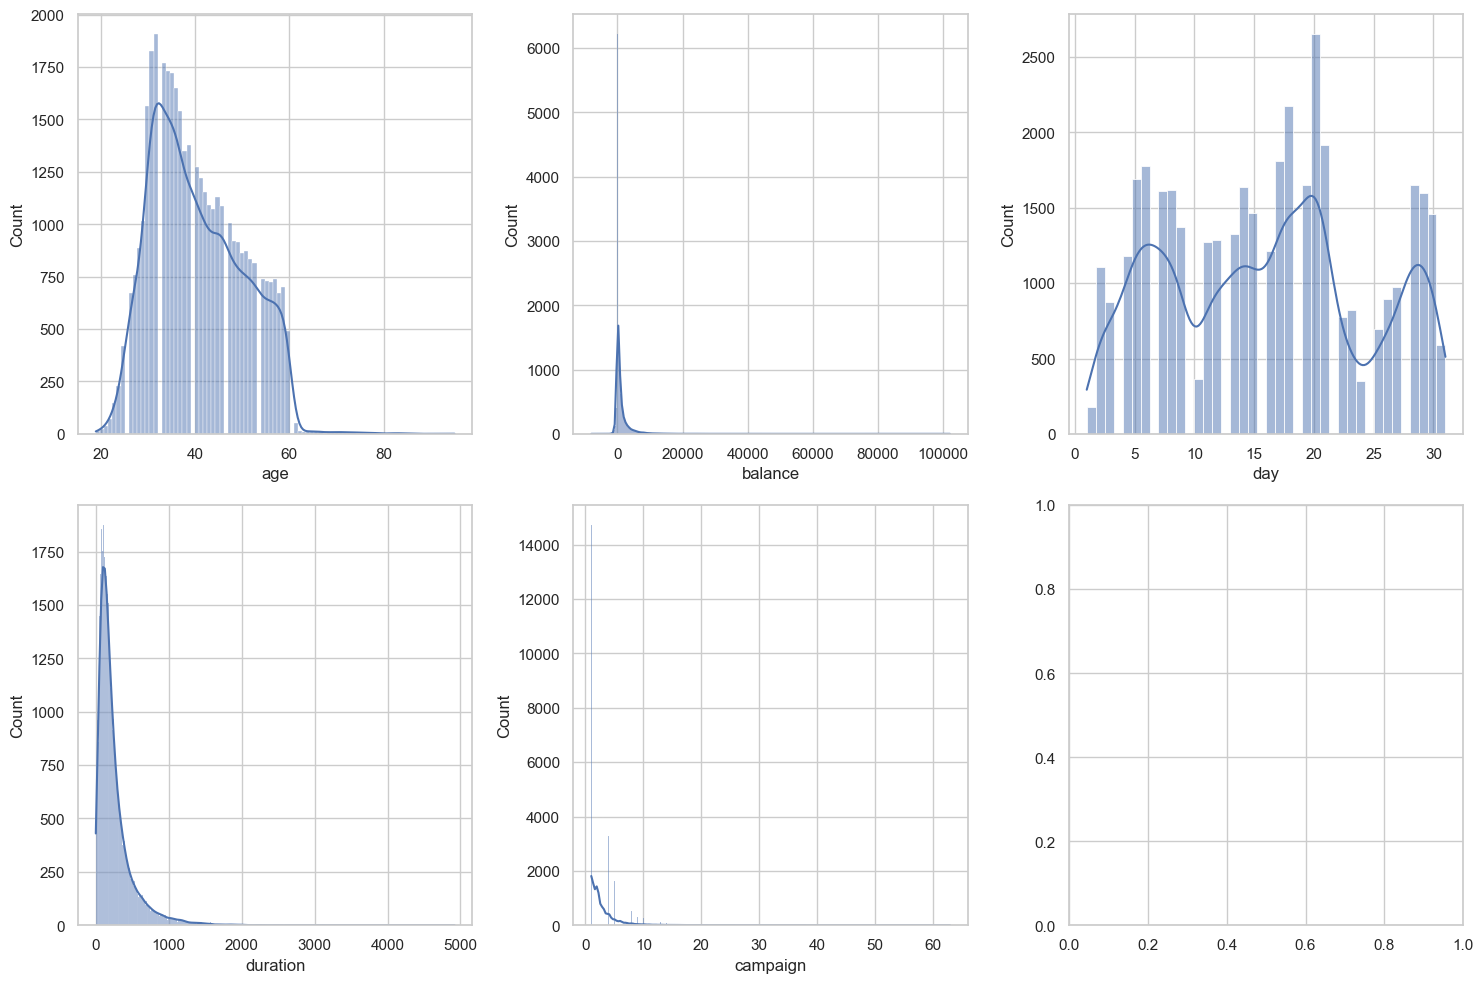

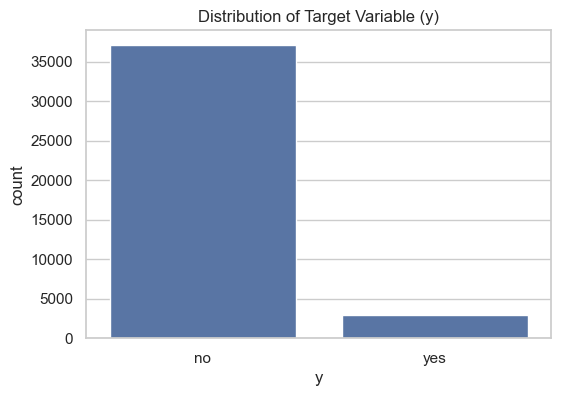

y
no     0.9276
yes    0.0724
Name: proportion, dtype: float64

In [4]:
# Analyzing the distribution of numeric variables
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign']
data[numeric_cols].describe()
#Setting the aesthetics for plots
sns.set(style="whitegrid")
# Checking the balance of the target variable 'y'
target_balance = data['y'].value_counts(normalize=True)

# Plotting distributions of numeric variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], ax=axs[i//3, i%3], kde=True)

# Adjusting the layout
plt.tight_layout()

# Plotting the balance of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (y)')

# Showing the plots
plt.show()

target_balance

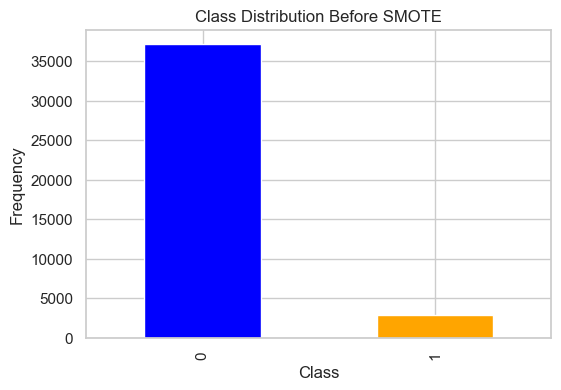

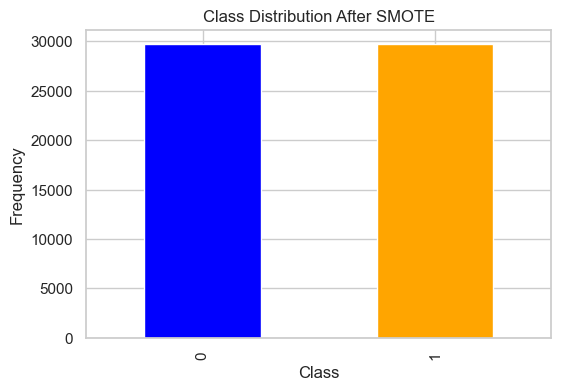

In [3]:
# Encode categorical variables
label_encoders = {}
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Visualize class imbalance before SMOTE
plt.figure(figsize=(6, 4))
data['y'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Splitting the data into features (X) and target variable (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Addressing class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize class imbalance after SMOTE
plt.figure(figsize=(6, 4))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()



F1 Score is not greater than 0.83
Average CV F1 Score: 0.9486881604571382
Test F1 Score: 0.5029850746268656
Test Precision: 0.4410994764397906
Test Recall: 0.5850694444444444


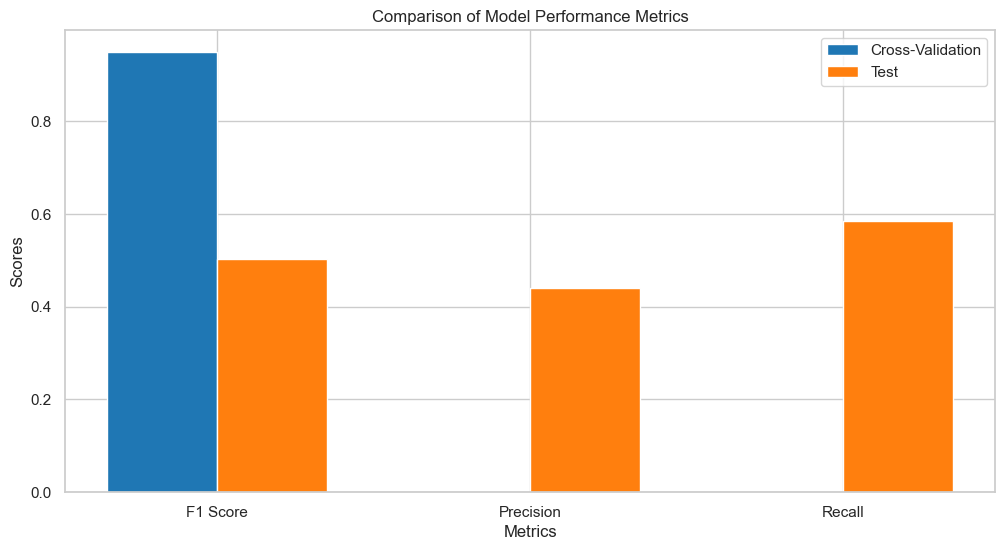

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")


# Load the dataset
data = pd.read_csv('/Users/venkat-a/Downloads/t2/t2/term-deposit-marketing-2020.csv')
# Display the first few rows of the dataset for an overview
data.head()

# Encode categorical variables
label_encoders = {}
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the data into features (X) and target variable (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Addressing class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier with resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Cross-validation for F1 Score on resampled data
cv_scores_f1 = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

# Average F1 score from cross-validation
average_cv_f1_score = np.mean(cv_scores_f1)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate F1 score, precision, and recall on the test set
test_f1_score = f1_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Check if F1 score is greater than 0.83
if test_f1_score > 0.83:
    print("F1 Score is greater than 0.83")
else:
    print("F1 Score is not greater than 0.83")

print('Average CV F1 Score:', average_cv_f1_score)
print('Test F1 Score:', test_f1_score)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)

# Plot for Validation (CV) and Test Scores
plt.figure(figsize=(12, 6))
metrics = ['F1 Score', 'Precision', 'Recall']
cv_scores = [average_cv_f1_score, np.nan, np.nan]  # Only F1 score available for CV
test_scores = [test_f1_score, test_precision, test_recall]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, cv_scores, width, label='Cross-Validation', color='#1f77b4')
plt.bar(x + width/2, test_scores, width, label='Test', color='#ff7f0e')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(x, metrics)
plt.legend()

plt.show()

In [5]:
# Define the models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

hyperparameters = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, None]},
    'GradientBoosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}


In [6]:
# Hyperparameter tuning and cross-validation
best_models = {}
cv_scores_f1 = {}
cv_scores_accuracy = {}
test_scores_f1 = {}
test_scores_accuracy = {}

for model_name in models:
    grid_search = GridSearchCV(models[model_name], hyperparameters[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Cross-validation scores
    cv_scores_f1[model_name] = np.mean(cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1'))
    cv_scores_accuracy[model_name] = np.mean(cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy'))





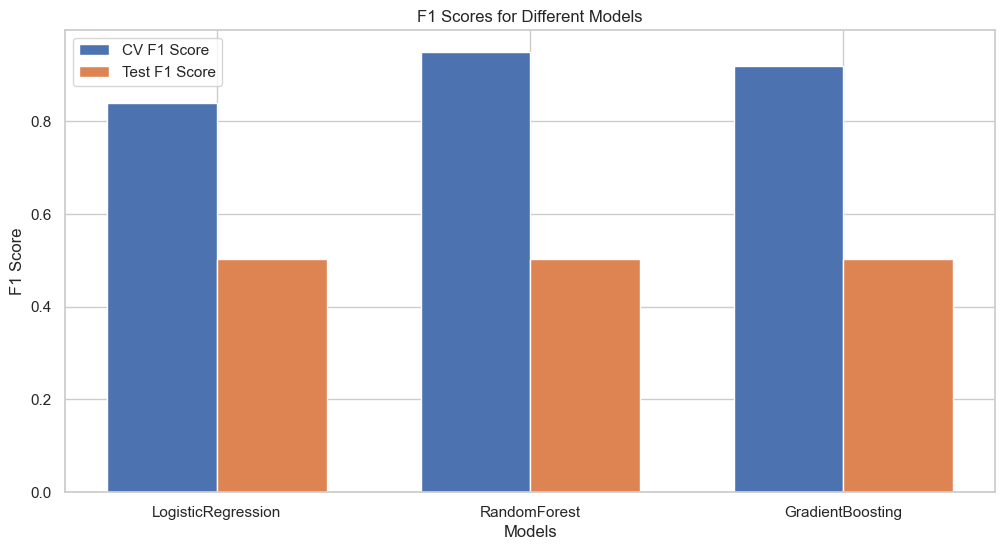

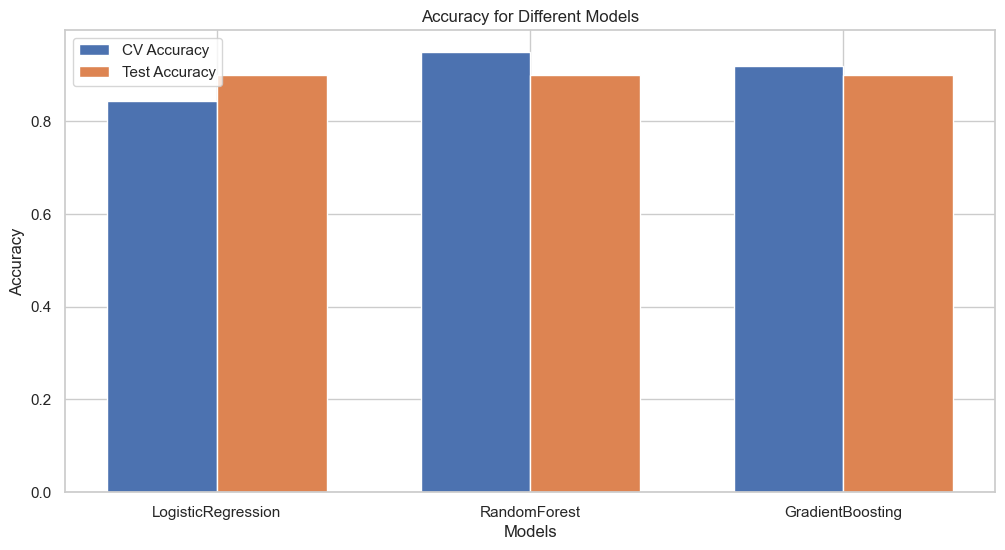

In [7]:

    # Test scores
    y_pred = best_model.predict(X_test)
    test_scores_f1[model_name] = f1_score(y_test, y_pred)
    test_scores_accuracy[model_name] = accuracy_score(y_test, y_pred)

# Plotting the scores
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(models))
# Plotting F1 scores
plt.bar(index, cv_scores_f1.values(), bar_width, label='CV F1 Score')
plt.bar(index + bar_width, test_scores_f1.values(), bar_width, label='Test F1 Score')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.xticks(index + bar_width / 2, models.keys())
plt.legend()

plt.show()

# Plotting Accuracy scores
plt.figure(figsize=(12, 6))

plt.bar(index, cv_scores_accuracy.values(), bar_width, label='CV Accuracy')
plt.bar(index + bar_width, test_scores_accuracy.values(), bar_width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.xticks(index + bar_width / 2, models.keys())
plt.legend()
plt.show()

Feature Importance
      Feature  Importance
11   duration    0.379806
5     balance    0.125630
0         age    0.108865
9         day    0.101867
10      month    0.078769
1         job    0.055523
12   campaign    0.046251
3   education    0.029507
2     marital    0.023907
8     contact    0.018081
6     housing    0.017226
7        loan    0.011024
4     default    0.003545


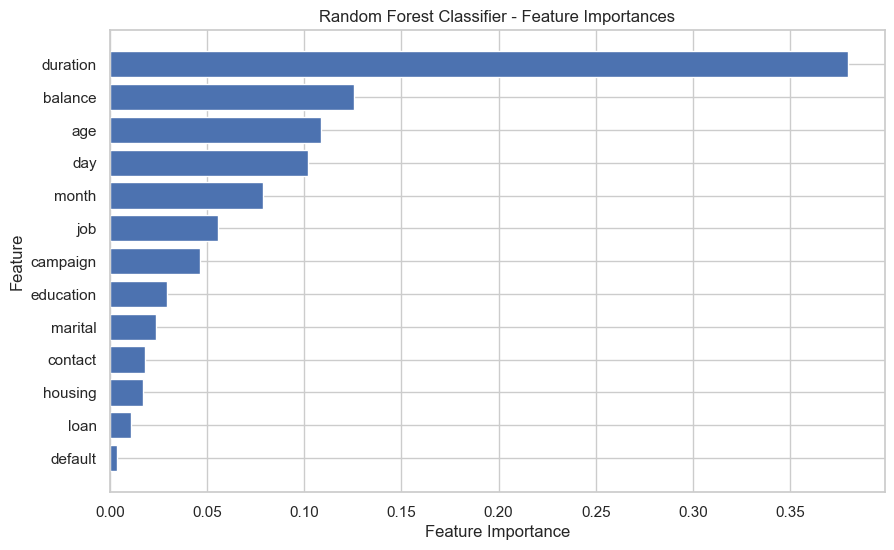

In [8]:
#Feature importance based on Accuracy
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Perform 5-fold cross-validation on the training data set
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
average_cv_score = np.mean(cv_scores)

# Predict on the test set and calculate accuracy
y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Extract and sort feature importances
feature_importances = rf_classifier.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print('Feature Importance')
print(features_df)
# Draw plots for feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features at the top
plt.show()

Average F1 Score based on Probabilities (Cross-Validation): 0.39216815433342933
F1 Score on Test Set based on Probabilities: 0.44196428571428575


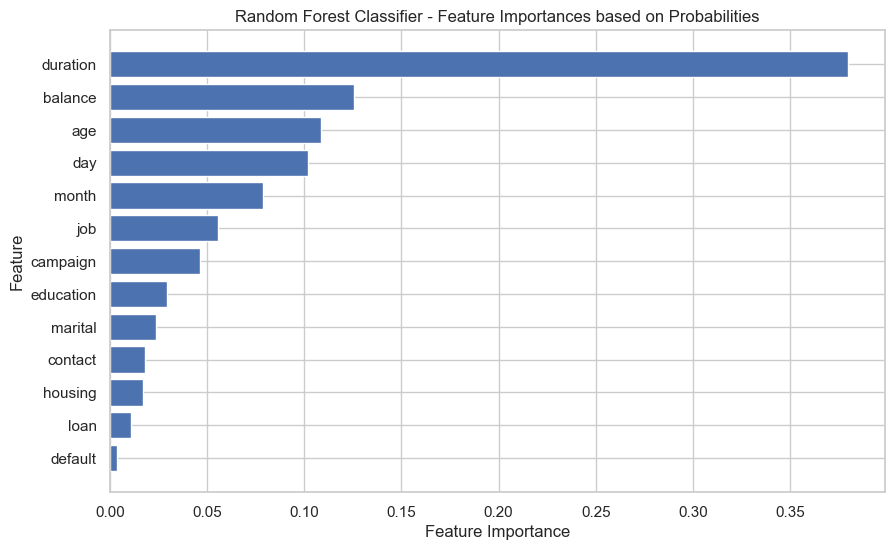

In [9]:
#Feature importance based on F1 score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Perform 5-fold cross-validation on the training data set with F1 score as the scoring metric
y_pred_cv = cross_val_predict(rf_classifier, X_train, y_train, cv=5, method='predict_proba')
average_cv_f1_score = f1_score(y_train, (y_pred_cv[:, 1] > 0.5).astype(int))

# Predict on the test set and calculate F1 score
y_pred_test = rf_classifier.predict_proba(X_test)[:, 1]
test_f1_score = f1_score(y_test, (y_pred_test > 0.5).astype(int))

# Extract and sort feature importances based on probabilities
feature_importances = rf_classifier.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print('Average F1 Score based on Probabilities (Cross-Validation):', average_cv_f1_score)
print('F1 Score on Test Set based on Probabilities:', test_f1_score)

# Draw plots for feature importances based on probabilities
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Feature Importances based on Probabilities')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features at the top
plt.show()


Cluster 1 Features:
['balance', 'age', 'day', 'month']
Cluster 2 Features:
['duration']
Cluster 3 Features:
['job', 'campaign', 'education', 'marital', 'contact', 'housing', 'loan', 'default']


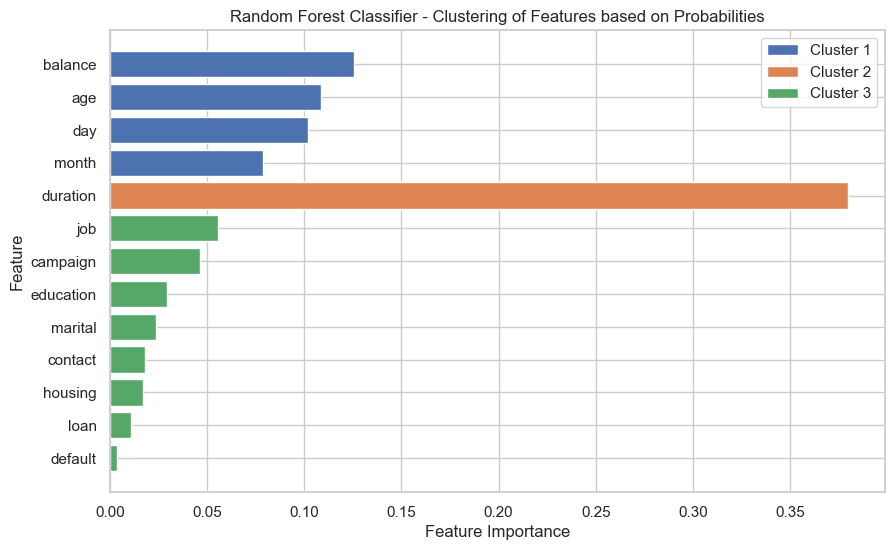

In [10]:
#Feature Importance- Clustering of Features based on Probabilities
from sklearn.cluster import KMeans

# Number of clusters for K-Means
num_clusters = 3  # You can adjust this as needed

# Fit K-Means clustering on the feature importances
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
features_df['Cluster'] = kmeans.fit_predict(features_df[['Importance']])

# Sort the features within each cluster by importance
features_df.sort_values(by=['Cluster', 'Importance'], ascending=[True, False], inplace=True)

# Print the features in each cluster
for cluster_id in range(num_clusters):
    cluster_features = features_df[features_df['Cluster'] == cluster_id]['Feature'].tolist()
    print(f'Cluster {cluster_id + 1} Features:')
    print(cluster_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_features = features_df[features_df['Cluster'] == cluster_id]['Feature']
    cluster_importance = features_df[features_df['Cluster'] == cluster_id]['Importance']
    plt.barh(cluster_features, cluster_importance, label=f'Cluster {cluster_id + 1}')

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Clustering of Features based on Probabilities')
plt.gca().invert_yaxis()
plt.legend()
plt.show()


Cluster 1: Contains features like 'job', 'campaign', 'education', 'marital', 'housing', 'contact', 'loan', and 'default'. These features have relatively lower importance.
Cluster 2: Only includes the 'duration' feature, indicating its distinct importance in the model.
Cluster 3: Comprises 'balance', 'age', 'day', and 'month'. These features are significantly important but less so than those in Cluster 2.

Accuracy: 0.9360833333333334


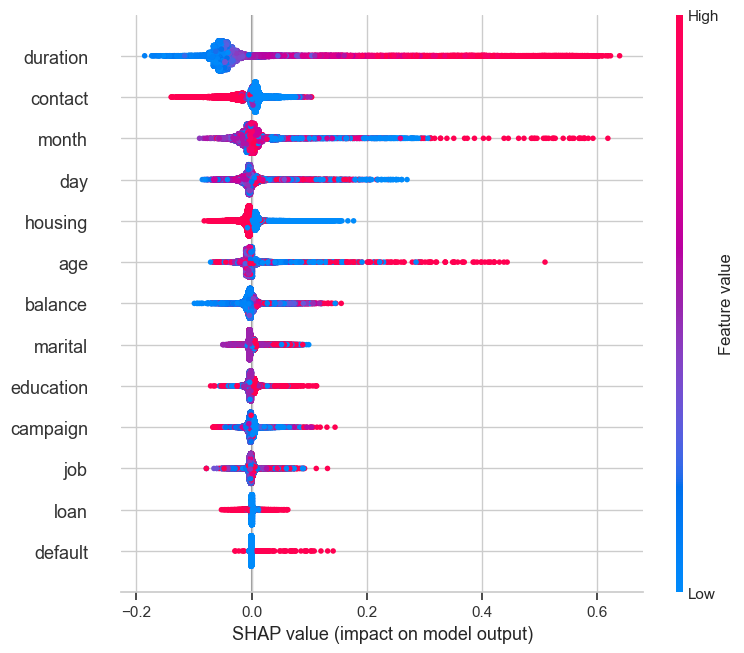

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
import lime
import lime.lime_tabular

# Load the dataset

dataset = pd.read_csv('/Users/venkat-a/Downloads/t2/t2/term-deposit-marketing-2020.csv')


# Encode categorical variables
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

# Splitting the dataset into features and target variable
features_df = dataset.drop('y', axis=1)
customer_importance = dataset['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, customer_importance, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# SHAP Analysis
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values[1], X_train)

# LIME Analysis for a single prediction
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features_df.columns, class_names=['No', 'Yes'], discretize_continuous=True)
i = 10  # Index of the instance to explain
exp = explainer.explain_instance(X_test.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)
